<a href="https://colab.research.google.com/github/NabhyaIoT2026/Machine-Learning/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset


In [20]:
data = pd.read_csv('weather.csv')

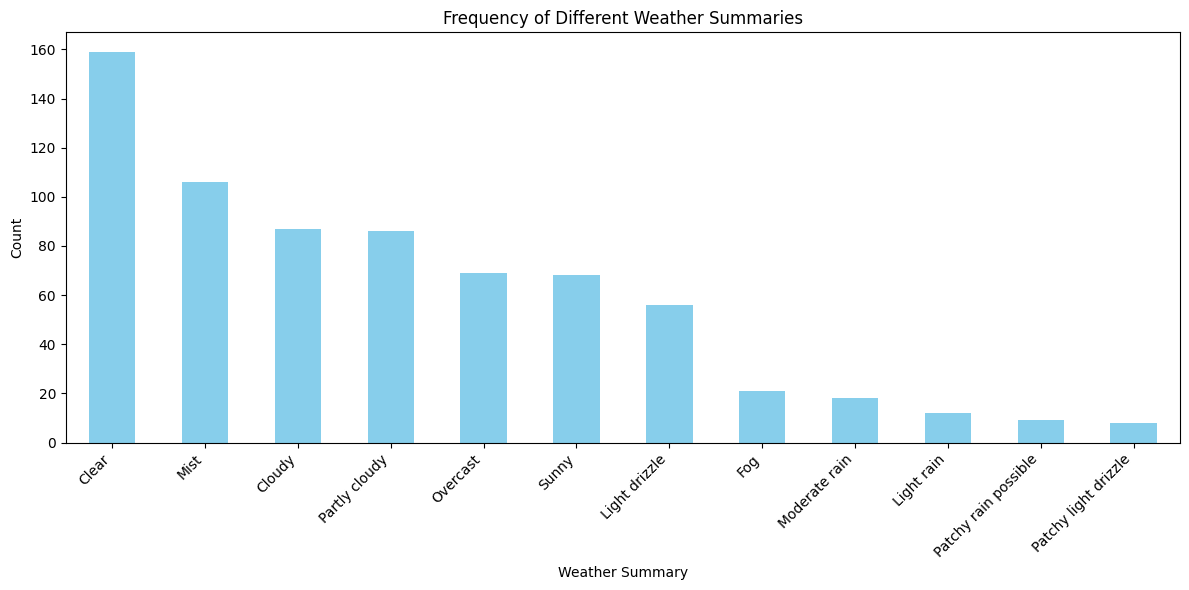

In [21]:
weather_summary_counts = data['weather__hourly__weatherDesc__value'].value_counts()

# Plot a bar chart for weather summary counts
plt.figure(figsize=(12, 6))
weather_summary_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Different Weather Summaries")
plt.xlabel("Weather Summary")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Target variable selection and binary classification based on median temperature

In [22]:
target_column = 'weather__hourly__tempC'
data['temp_category'] = (data[target_column] >= data[target_column].median()).astype(int)

Drop unnecessary columns

In [23]:
drop_columns = ['City', 'weather__hourly__UTCdate', 'weather__hourly__UTCtime', target_column]
data = data.drop(columns=drop_columns)

Handling categorical data and missing values if necessary

In [24]:
data = pd.get_dummies(data, drop_first=True)

Splitting data into features and target

In [25]:
X = data.drop(columns=['temp_category'])
y = data['temp_category']

Split data into training and test sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature scaling

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Define models

In [28]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

Train and evaluate each model


Logistic Regression Metrics:
Accuracy: 0.96
Precision: 0.96
R-squared: 0.83


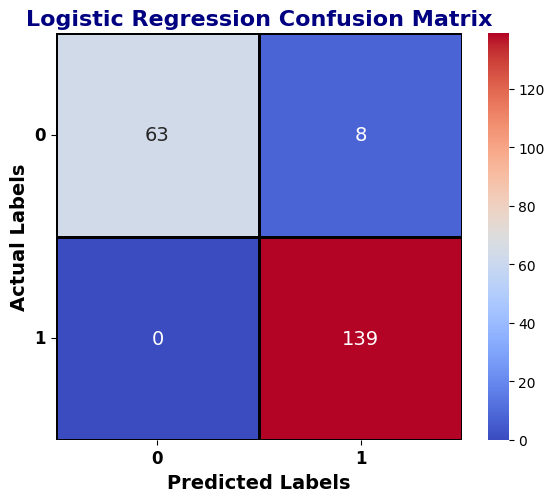


Decision Tree Metrics:
Accuracy: 1.00
Precision: 1.00
R-squared: 1.00


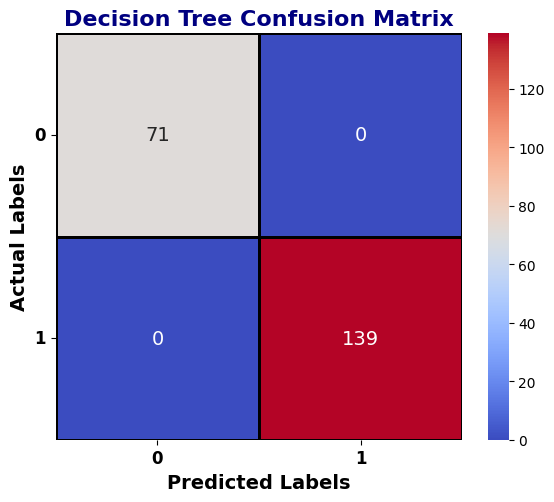


Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
R-squared: 1.00


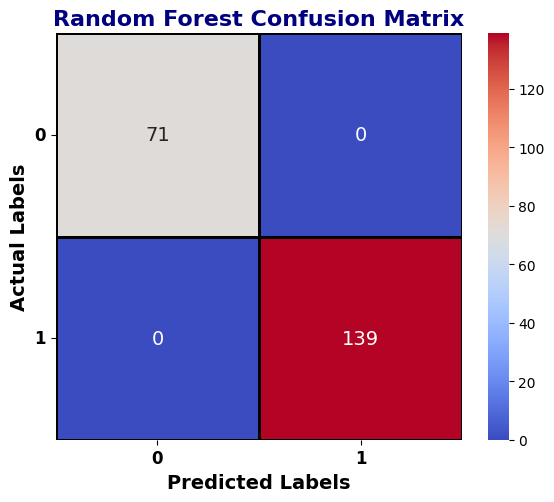


K-Nearest Neighbors Metrics:
Accuracy: 0.91
Precision: 0.91
R-squared: 0.60


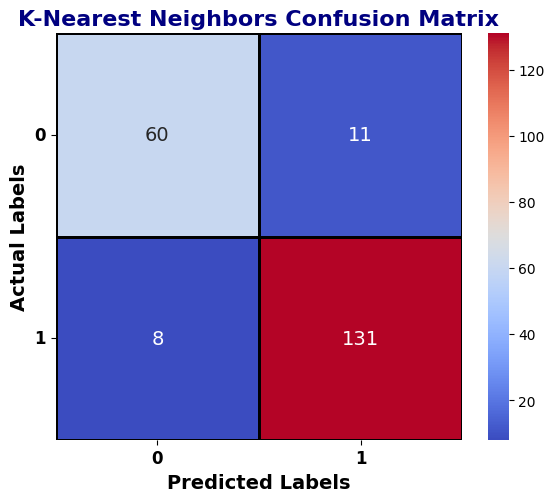

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Metrics:
Accuracy: 1.00
Precision: 1.00
R-squared: 1.00


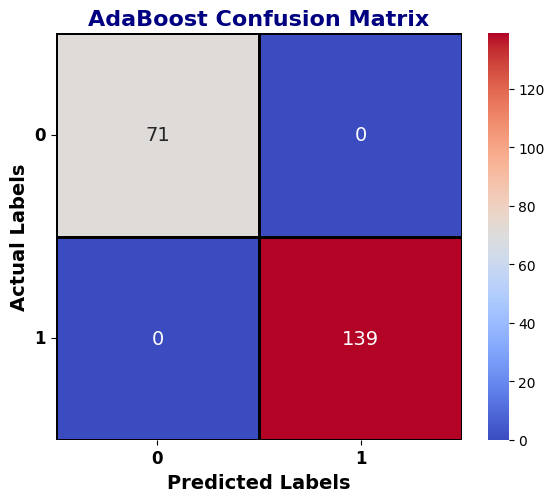

In [32]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # For multiclass, use 'weighted' or 'macro'
    r_squared = r2_score(y_test, y_pred)  # This can give insights for classification, though more commonly used for regression

    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"R-squared: {r_squared:.2f}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix with a more aesthetic style
    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="coolwarm", cbar=True,
        annot_kws={"size": 14}, linewidths=1, linecolor='black', square=True
    )

    # Title and labels with improved font settings
    plt.title(f"{model_name} Confusion Matrix", fontsize=16, weight='bold', color='navy')
    plt.xlabel("Predicted Labels", fontsize=14, weight='bold')
    plt.ylabel("Actual Labels", fontsize=14, weight='bold')

    # Adjust layout for readability
    plt.xticks(fontsize=12, weight='bold')
    plt.yticks(fontsize=12, weight='bold', rotation=0)
    plt.tight_layout()
    plt.show()

Define a figure for plotting the comparison graph

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


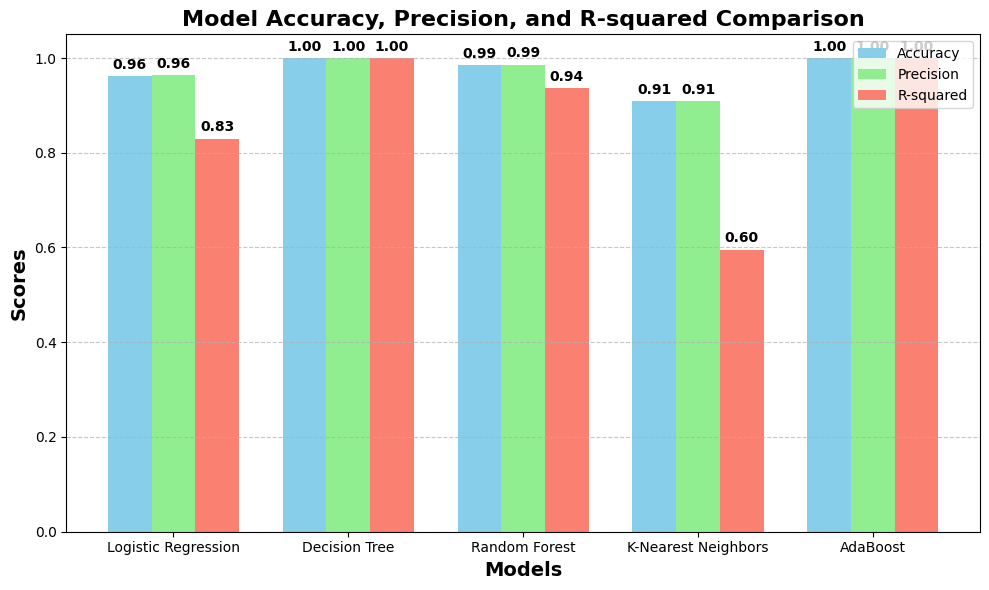

In [33]:
model_names = []
accuracies = []
precisions = []
r_squareds = []

# Calculate metrics for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, and R-squared
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    r_squared = r2_score(y_test, y_pred)

    # Store metrics
    model_names.append(model_name)
    accuracies.append(accuracy)
    precisions.append(precision)
    r_squareds.append(r_squared)

# Plot comparison of accuracy, precision, and R-squared
x = np.arange(len(model_names))  # Model indices
width = 0.25  # Width of bars

# Create subplots with grouped bars for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each metric
bar1 = ax.bar(x - width, accuracies, width, label='Accuracy', color='skyblue')
bar2 = ax.bar(x, precisions, width, label='Precision', color='lightgreen')
bar3 = ax.bar(x + width, r_squareds, width, label='R-squared', color='salmon')

# Add metric values on top of each bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')

# Labels and title
ax.set_xlabel("Models", fontsize=14, weight='bold')
ax.set_ylabel("Scores", fontsize=14, weight='bold')
ax.set_title("Model Accuracy, Precision, and R-squared Comparison", fontsize=16, weight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Grid and layout adjustments
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()